In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
def css_styling():
    styles = """
<style>
.output_png { text-align:  center; }
</style>
    """
    return HTML(styles)
css_styling()


import numpy as np

### Wykład 10 
# Wielowarstwowe sieci neuronowe
14.12.2016 r.

## Historia: perceptron liniowy

(Frank Rosenblatt, 1957)
* Aparat przeznaczony do rozpoznawania obrazu.
* 400 fotokomórek.
* Wagi to potencjometry.
* Wagi aktualizowane za pomocą silniczków.

<img style="margin: auto" width="80%" src="http://m.natemat.pl/b94a41cd7322e1b8793e4644e5f82683,641,0,0,0.png" alt="Frank Rosenblatt"/>

<img style="margin: auto" src="http://m.natemat.pl/02943a7dc0f638d786b78cd5c9e75742,641,0,0,0.png" width="70%" alt="Frank Rosenblatt"/>


The New York Times, 1958:
> [...] the embryo of an electronic computer that the Navy expects will be able to walk, talk, see, write, reproduce itself and be conscious of its existence.

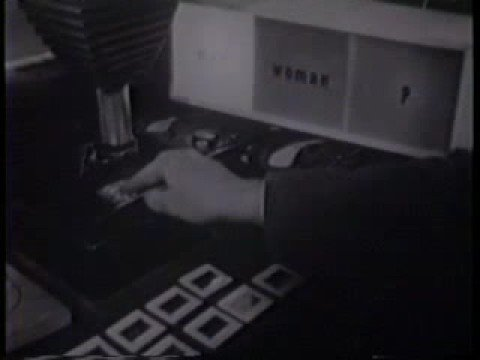

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI', width=800, height=600)

## Uczenie

Cykl uczenia perceptronu (2000 "epok"):
* pokazanie (do kamery cyfrowej) planszy z kolejnym obiektem (np. trójkat, koło, kwadrat,...),
* zaobserwowanie, jaka lampka się zapaliła na wyjściu,
* sprawdzenie, czy jest to właściwa lampka (arbitralnie ustalona),
* wysłanie sygnału "nagrody" lub "kary",
* brak ingerencji człowieka, który tylko "podaje" informacje.

## Perceptron: formalizacja

Nieliniowa funkcja aktywacji (Rosenblatt: funkcja schodkowa):

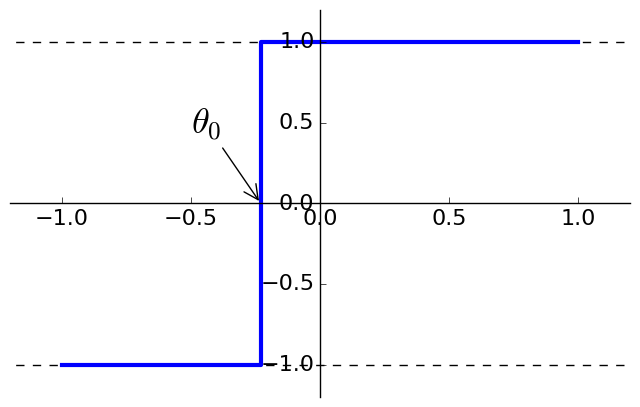

In [15]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(8,5))
x = [-1,-.23,1] 
y = [-1, -1, 1]
plt.ylim(-1.2,1.2)
plt.xlim(-1.2,1.2)
plt.plot([-2,2],[1,1], color='black', ls="dashed")
plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
plt.step(x, y, lw=3)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.annotate(r'$\theta_0$',
             xy=(-.23,0), xycoords='data',
             xytext=(-50, +50), textcoords='offset points', fontsize=26,
             arrowprops=dict(arrowstyle="->"))

plt.show()

Funkcja bipolarna:

$$ g(z) = \left\{ 
\begin{array}{rl}
1  & \textrm{gdy $z > \theta_0$} \\
-1 & \textrm{wpp.}
\end{array}
\right. $$

gdzie $z = \theta_0x_0 + \ldots + \theta_nx_n$,<br/>
$\theta_0$ to próg aktywacji,<br/>
$x_0 = 1$. 

## Perceptron

<img src="perceptron.png" />

## Pseudokod

* Ustal wartości początkowe $\theta$ (wektor 0 lub liczby losowe blisko 0).
* Dla każdego przykładu $(x^{(i)}, y^{(i)})$, dla $i=1,\ldots,m$
    * Oblicz wartość wyjścia $o^{(i)}$:
    $$o^{(i)} = g(\theta^{T}x^{(i)}) = g(\sum_{j=0}^{n} \theta_jx_j^{(i)})$$
    * Wykonaj aktualizację wag (tzw. ***perceptron rule***):
    $$ \theta := \theta + \Delta \theta $$
    $$ \Delta \theta = \alpha(y^{(i)}-o^{(i)})x^{(i)} $$

$$\theta_j := \theta_j + \Delta \theta_j $$

**Poprawnie zaklasyfikowane**:

* $y^{(i)}=1$ oraz $o^{(i)}=1$ : $$\Delta\theta_j = \alpha(1 - 1)x_j^{(i)} = 0$$
* $y^{(i)}=-1$ oraz $o^{(i)}=-1$ : $$\Delta\theta_j = \alpha(-1 - -1)x_j^{(i)} = 0$$

Skoro trafiłeś, to nic nie zmieniaj!

$$\theta_j := \theta_j + \Delta \theta_j $$

**Niepoprawnie zaklasyfikowane**:

* $y^{(i)}=1$ oraz $o^{(i)}=-1$ : $$\Delta\theta_j = \alpha(1 - -1)x_j^{(i)} = 2 \alpha x_j^{(i)}$$
* $y^{(i)}=-1$ oraz $o^{(i)}=1$ : $$\Delta\theta_j = \alpha(-1 - 1)x_j^{(i)} = -2 \alpha x_j^{(i)}$$

Przesuń w wagi w odpowiednią stronę:
* zmniejsz jeśli niepoprawnie przekroczono próg
* zwiększ, jeśli nie przekroczono

## Zalety:
* Dosyć intuicyjny (+ analogia do biologicznych neuronów) i prosty.
* Łatwa implementacja.
* Wykazano, że konwerguje w skończonym czasie, gdy dane można linowo oddzielić.

## Wady:
* Może "skakać" w nieskończoność dla danych, których nie da się oddzielić liniowo.

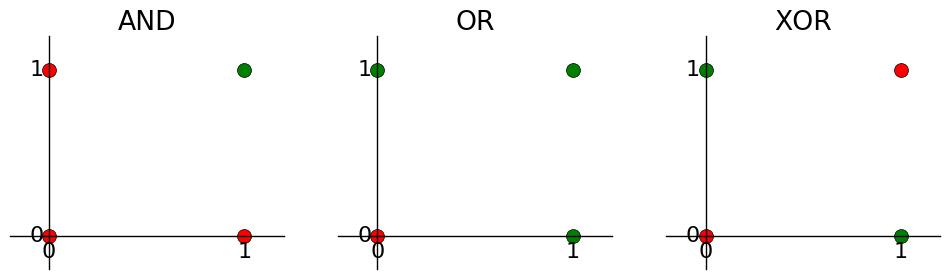

In [5]:
plt.figure(figsize=(12,3))

plt.subplot(131)
plt.ylim(-0.2,1.2)
plt.xlim(-0.2,1.2)

plt.title('AND')
plt.plot([1,0,0], [0,1,0], 'ro', markersize=10)
plt.plot([1], [1], 'go', markersize=10)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('none')
ax.spines['left'].set_position(('data',0))

plt.xticks(np.arange(0, 2, 1.0))
plt.yticks(np.arange(0, 2, 1.0))


plt.subplot(132)
plt.ylim(-0.2,1.2)
plt.xlim(-0.2,1.2)

plt.plot([1,0,1], [0,1,1], 'go', markersize=10)
plt.plot([0], [0], 'ro', markersize=10)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('none')
ax.spines['left'].set_position(('data',0))

plt.title('OR')
plt.xticks(np.arange(0, 2, 1.0))
plt.yticks(np.arange(0, 2, 1.0))


plt.subplot(133)
plt.ylim(-0.2,1.2)
plt.xlim(-0.2,1.2)

plt.title('XOR')
plt.plot([1,0], [0,1], 'go', markersize=10)
plt.plot([0,1], [0,1], 'ro', markersize=10)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('none')
ax.spines['left'].set_position(('data',0))

plt.xticks(np.arange(0, 2, 1.0))
plt.yticks(np.arange(0, 2, 1.0))

plt.show()

## Inna funkcja aktywacji?

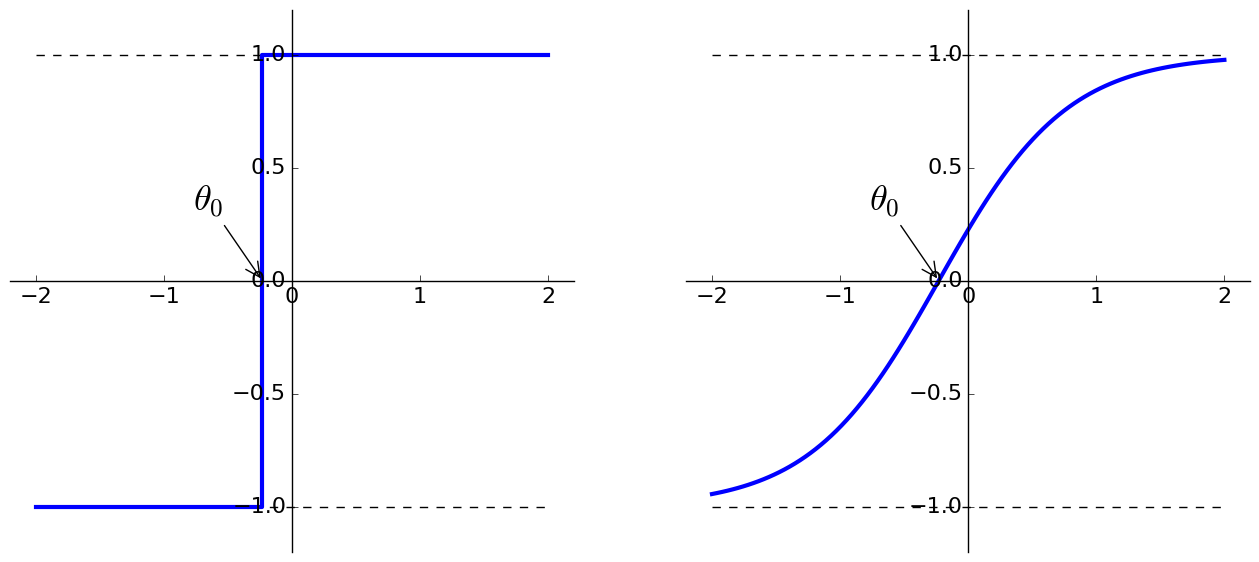

In [6]:
plt.figure(figsize=(16,7))
plt.subplot(121)
x = [-2,-.23,2] 
y = [-1, -1, 1]
plt.ylim(-1.2,1.2)
plt.xlim(-2.2,2.2)
plt.plot([-2,2],[1,1], color='black', ls="dashed")
plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
plt.step(x, y, lw=3)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.annotate(r'$\theta_0$',
             xy=(-.23,0), xycoords='data',
             xytext=(-50, +50), textcoords='offset points', fontsize=26,
             arrowprops=dict(arrowstyle="->"))

plt.subplot(122)
x2 = np.linspace(-2,2,100)
y2 = np.tanh(x2+ 0.23)
plt.ylim(-1.2,1.2)
plt.xlim(-2.2,2.2)
plt.plot([-2,2],[1,1], color='black', ls="dashed")
plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
plt.plot(x2, y2, lw=3)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.annotate(r'$\theta_0$',
             xy=(-.23,0), xycoords='data',
             xytext=(-50, +50), textcoords='offset points', fontsize=26,
             arrowprops=dict(arrowstyle="->"))

plt.show()

## + SGD

## Perceptron a$\ldots$ 

* regresja liniowa
* binarna regresja logistyczna
* wieloklasowa regresja logistyczna

## Perceptron a regresja liniowa

<img src="reglin.png" />

## Uczenie regresji liniowej:
* Model: $$h_{\theta}(x) = \sum_{i=0}^n \theta_ix_i$$
* Funkcja kosztu (błąd średniokwadratowy): $$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

* Po obliczeniu $\nabla J(\theta)$, zwykły SGD.

## Perceptron<br/>a binarna regresja logistyczna

<img src="reglog.png" />

## Uczenie binarnej regresji logistycznej:
* Model: $$h_{\theta}(x) = \sigma(\sum_{i=0}^n \theta_ix_i) = P(1|x,\theta)$$
* Funkcja kosztu (entropia krzyżowa): $$\begin{eqnarray} J(\theta) &=& -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log P(1|x^{(i)},\theta) \\ && + (1-y^{(i)})\log(1-P(1|x^{(i)},\theta))]\end{eqnarray}$$

* Po obliczeniu $\nabla J(\theta)$, zwykły SGD.

## Perceptron<br/>a wieloklasowa regresja logistyczna

<img src="multireglog.png" />

## Wieloklasowa regresji logistyczna
* Model (dla $c$ klasyfikatorów binarnych): 
$$\begin{eqnarray}
h_{(\theta^{(1)},\dots,\theta^{(c)})}(x) &=& \mathrm{softmax}(\sum_{i=0}^n \theta_{i}^{(1)}x_i, \ldots, \sum_{i=0}^n \theta_i^{(c)}x_i) \\ 
&=& \left[ P(k|x,\theta^{(1)},\dots,\theta^{(c)}) \right]_{k=1,\dots,c} 
\end{eqnarray}$$
* Funkcja kosztu (**przymując model regresji binarnej**): $$\begin{eqnarray} J(\theta^{(k)}) &=& -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log P(k|x^{(i)},\theta^{(k)}) \\ && + (1-y^{(i)})\log P(\neg k|x^{(i)},\theta^{(k)})]\end{eqnarray}$$

* Po obliczeniu $\nabla J(\theta)$, **c-krotne** uruchomienie SGD, zastosowanie $\mathrm{softmax}(X)$ do niezależnie uzyskanych klasyfikatorów binarnych.

* Przyjmijmy: 
$$ \Theta = (\theta^{(1)},\dots,\theta^{(c)}) $$

$$h_{\Theta}(x) = \left[ P(k|x,\Theta) \right]_{k=1,\dots,c}$$

$$\delta(x,y) = \left\{\begin{array}{cl} 1 & \textrm{gdy } x=y \\ 0 & \textrm{wpp.}\end{array}\right.$$

* Wieloklasowa funkcja kosztu $J(\Theta)$ (kategorialna entropia krzyżowa):
$$ J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{c} \delta({y^{(i)},k}) \log P(k|x^{(i)},\Theta) $$

* Gradient $\nabla J(\Theta)$:
$$ \dfrac{\partial J(\Theta)}{\partial \Theta_{j,k}} = -\frac{1}{m}\sum_{i = 1}^{m} (\delta({y^{(i)},k}) - P(k|x^{(i)}, \Theta)) x^{(i)}_j 
$$

* Liczymy wszystkie wagi jednym uruchomieniem SGD

## Podsumowanie

* W przypadku jednowarstowej sieci neuronowej wystarczy znać gradient funkcji kosztu.
* Wtedy liczymy tak samo jak w przypadku regresji liniowej, logistycznej, wieloklasowej logistycznej itp.
  * Wymienione modele to szczególne przypadki jednowarstwowych sieci neuronowych.
* Regresja liniowa i binarna regresja logistyczna to jeden neuron.
* Wieloklasowa regresja logistyczna to tyle neuronów ile klas.

Funkcja aktywacji i funkcja kosztu są **dobierane do problemu**.

## Sieci wielowarstwowe

a.k.a. _Artificial Neural Network_ (ANN), _Multi-Layer Perceptron_ (MLP).

<img src="nn1.png" />

## Architektura sieci

* Sieć neuronowa jako graf neuronów. 
* Organizacja sieci przez warstwy.
* Najczęściej stosowane są sieci jednokierunkowe i gęste.

* $n$-warstwowa sieć neuronowa ma $n+1$ warstw (nie liczymy wejścia).
* Rozmiary sieci określane poprzez liczbę neuronów lub parametrów.

## Feedforward #1

* Mając daną $n$-warstwową sieć neuronową oraz jej parametry $\Theta^{(1)}, \ldots, \Theta^{(L)} $ oraz $\beta^{(1)}, \ldots, \beta^{(L)} $ liczymy:<br/><br/> 
$$a^{(l)} = g^{(l)}\left( a^{(l-1)} \Theta^{(l)} + \beta^{(l)} \right). $$

<img src="nn2.png" />

## Feedforward #2

* Funkcje $g^{(l)}$ to tzw. **funkcje aktywacji**.<br/>
Dla $i = 0$ przyjmujemy $a^{(0)} = \mathrm{x}$ (wektor wierszowy cech) oraz $g^{(0)}(x) = x$ (identyczność).

* Parametry $\Theta$ to wagi na połączeniach miedzy neuronami dwóch warstw.<br/>
Rozmiar macierzy $\Theta^{(l)}$, czyli macierzy wag na połączeniach warstw $a^{(l-1)}$ i $a^{(l)}$, to $\dim(a^{(l-1)}) \times \dim(a^{(l)})$.

* Parametry $\beta$ zastępują tutaj dodawanie kolumny z jedynkami do macierzy cech.<br/>Macierz $\beta^{(l)}$ ma rozmiar równy liczbie neuronów w odpowiedniej warstwie, czyli $1 \times \dim(a^{(l)})$.

## Feedforward #3

* **Klasyfikacja**: dla ostatniej warstwy $L$ (o rozmiarze równym liczbie klas) przyjmuje się $g^{(L)}(x) = \mathop{\mathrm{softmax}}(x)$.
* **Regresja**: pojedynczy neuron wyjściowy jak na obrazku. Funkcją aktywacji może wtedy być np. funkcja identycznościowa.

* Pozostałe funkcje aktywacji najcześciej mają postać sigmoidy, np. sigmoidalna, tangens hiperboliczny.<br/> Ale niekoniecznie, np. ReLU, leaky ReLU, maxout.

## Uczenie wielowarstwowych sieci neuronowych

Mając algorytm SGD oraz gradienty wszystkich wag, moglibyśmy trenować każdą sieć.

* Niech:
$$\Theta = (\Theta^{(1)},\Theta^{(2)},\Theta^{(3)},\beta^{(1)},\beta^{(2)},\beta^{(3)})$$

* Funkcja sieci neuronowej z grafiki:

$$\small h_\Theta(x) = \tanh(\tanh(\tanh(x\Theta^{(1)}+\beta^{(1)})\Theta^{(2)} + \beta^{(2)})\Theta^{(3)} + \beta^{(3)})$$
* Funkcja kosztu dla regresji:
$$J(\Theta) = \dfrac{1}{2m} \sum_{i=1}^{m} (h_\Theta(x^{(i)})- y^{(i)})^2 $$

Jak obliczymy gradienty?

$$\nabla_{\Theta^{(l)}} J(\Theta) = ? \quad \nabla_{\beta^{(l)}} J(\Theta) = ?$$

* Postać funkcji kosztu zależna od wybranej architektury sieci oraz funkcji aktywacji.

$$\small J(\Theta) = \frac{1}{2}(a^{(L)} - y)^2 $$
$$\small  \dfrac{\partial}{\partial a^{(L)}} J(\Theta) = a^{(L)} - y$$

$$\small \tanh^{\prime}(x) = 1 - \tanh^2(x)$$

Już na następnym wykładzie$\dots$
## Algorytm propagacji wstecznej błędu
## SGD z propagacją wsteczną